In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import warnings

warnings.filterwarnings('ignore')

# Modeled p-value vs Actual p-value

In [69]:
def check_pvalue(sample_size, baseline, n):
    result = []
    for i in range(n):
        np.random.seed(i)
        # Кол-во бросков монеты в эксперименте + вероятность выпадения Орла
        result.append(np.random.binomial(sample_size, baseline))

    df = pd.DataFrame({"exp": result})
    # Считаем отклонения от нормы и без учета знака, так как двухсторонняя проверка
    df["difference"] = abs(df["exp"] - sample_size * baseline)

    # Посчитаем потенциальный FPR для каждого полученного отклонения от нормы  
    diff = df["difference"].unique().tolist()
    diff.sort()

    # Посчитаем p-value с помощью Монте-Карло 
    data = pd.DataFrame()
    for i in diff:
        data = pd.concat(
            [data, pd.DataFrame({"heads": [i], "pvalue_montecarlo": (df["difference"] >= i).mean()})],
            axis=0)

    # Посчитаем p-value с помощью СтатТеста
    data['pvalue_ztest'] = data['heads'].apply(
        lambda x: proportions_ztest(sample_size * baseline - x, sample_size, baseline, alternative='two-sided')[1])

    data.set_index('heads').plot(title=f"Sample size: {sample_size}");

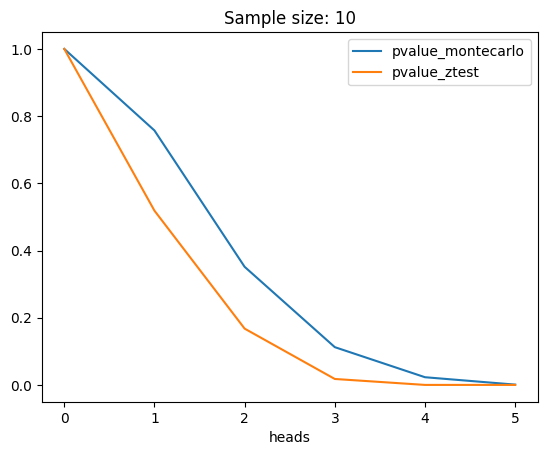

In [70]:
check_pvalue(sample_size=10, baseline=0.5, n=10_000)

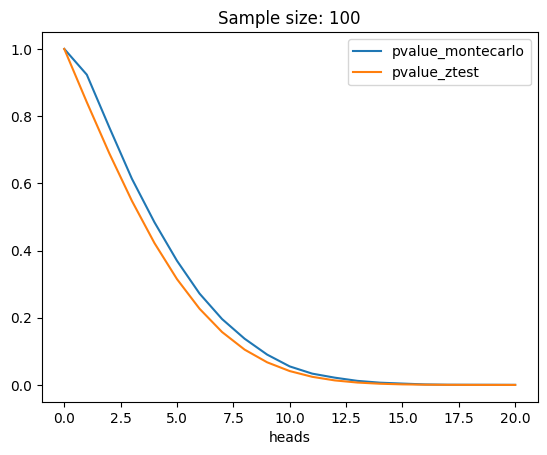

In [71]:
check_pvalue(sample_size=100, baseline=0.5, n=10_000)

# Desired FPR vs actual FPR

In [78]:
def check_fpr(sample_size, baseline, significance, n):
    result = []
    for i in range(n):
        np.random.seed(i)
        result.append(np.random.binomial(sample_size, baseline))

    df = pd.DataFrame(result)

    actual = (df[0].apply(
        lambda x: proportions_ztest(x, sample_size, baseline, alternative='two-sided')[1]) < significance).mean()

    print(f"Sample size: {sample_size} | Desired FPR: {significance:.2%} | Actual FPR: {actual:.2%}")

In [82]:
for i in range(10, 30 + 1, 2):
    check_fpr(sample_size=i, baseline=0.5, significance=0.05, n=10_000)

Sample size: 10 | Desired FPR: 5.00% | Actual FPR: 11.24%
Sample size: 12 | Desired FPR: 5.00% | Actual FPR: 14.94%
Sample size: 14 | Desired FPR: 5.00% | Actual FPR: 5.83%
Sample size: 16 | Desired FPR: 5.00% | Actual FPR: 7.86%
Sample size: 18 | Desired FPR: 5.00% | Actual FPR: 9.78%
Sample size: 20 | Desired FPR: 5.00% | Actual FPR: 4.47%
Sample size: 22 | Desired FPR: 5.00% | Actual FPR: 5.37%
Sample size: 24 | Desired FPR: 5.00% | Actual FPR: 6.43%
Sample size: 26 | Desired FPR: 5.00% | Actual FPR: 7.73%
Sample size: 28 | Desired FPR: 5.00% | Actual FPR: 8.90%
Sample size: 30 | Desired FPR: 5.00% | Actual FPR: 4.60%
